In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
df_true = pd.read_csv('/content/drive/My Drive/Fake News/True.csv')
df_fake= pd.read_csv('/content/drive/My Drive/Fake News/Fake.csv')


Mounted at /content/drive


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Add flag to track fake and real**

In [ ]:

df_true['target'] = 0
df_fake['target'] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

**Concatenate dataframes**

In [ ]:

df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


**Shuffle the data**

In [ ]:
from sklearn.utils import shuffle
df_merge = shuffle(df_merge)
df_merge = df_merge.reset_index(drop=True)

In [ ]:
df_merge.head()

,title,text,subject,date,target
0,FEDERAL JUDGE Goes On Rant About Cops Killing ...,This is a great story for anyone who doesn t u...,left-news,"Aug 18, 2016",1
1,Albania woos luxury hotel brands with tax breaks,TIRANA (Reuters) - Albania is planning to try ...,worldnews,"December 7, 2017",0
2,"Trump says will discuss military issues, Qatar...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 7, 2017",0
3,Melania Trump Gone AWOL: Trump Campaign Total...,If you ve recently noticed that you haven t se...,News,"September 9, 2016",1
4,Trump on nuclear weapons tweet: 'Let it be an ...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"December 23, 2016",0


In [ ]:
df = df_merge.drop(["title","date"], axis = 1)

**Data Exploration**

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


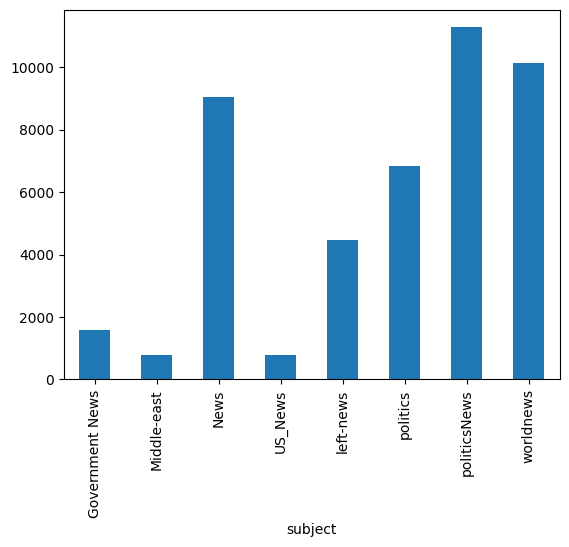

In [ ]:
import matplotlib.pyplot as plt
print(df.groupby(['subject']) ['text'].count())
df.groupby(['subject']) ['text'].count().plot(kind="bar")
plt.show()

In [ ]:
df['target'].value_counts()

target
1    23481
0    21417
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

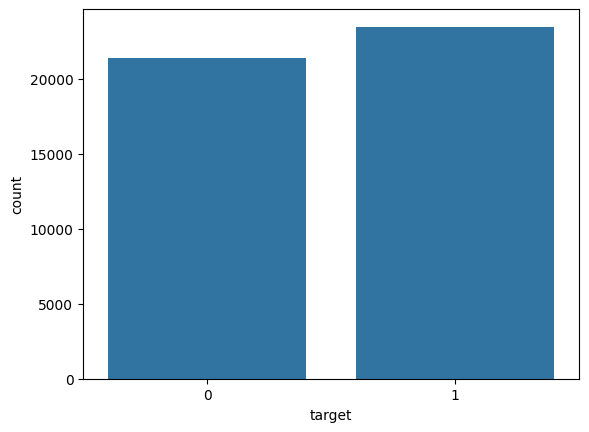

In [ ]:
import seaborn as sns
sns.countplot(x='target',data=df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


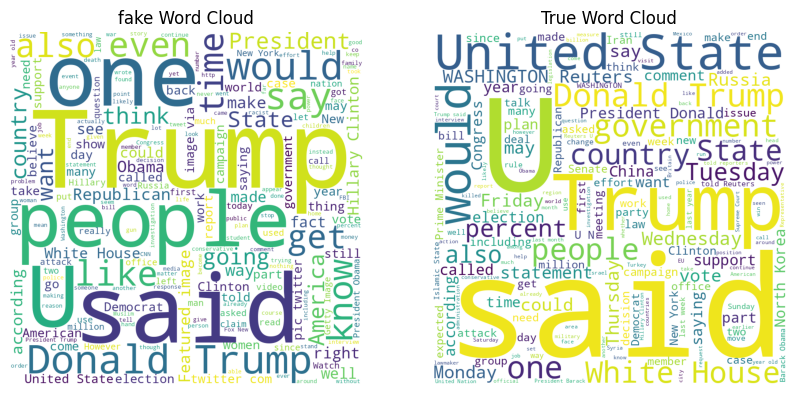

In [ ]:
from wordcloud import WordCloud


# Download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# Filter true and fake texts
fake = df[df['target'] == 1]['text'].str.cat(sep=' ')
true = df[df['target'] == 0]['text'].str.cat(sep=' ')

# Generate word clouds
fake_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(fake)
true_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(true)

# Plot word clouds
plt.figure(figsize = (10, 10), facecolor = None)
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud)
plt.axis("off")
plt.title('fake Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(true_wordcloud)
plt.axis("off")
plt.title('True Word Cloud')

plt.show()


In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

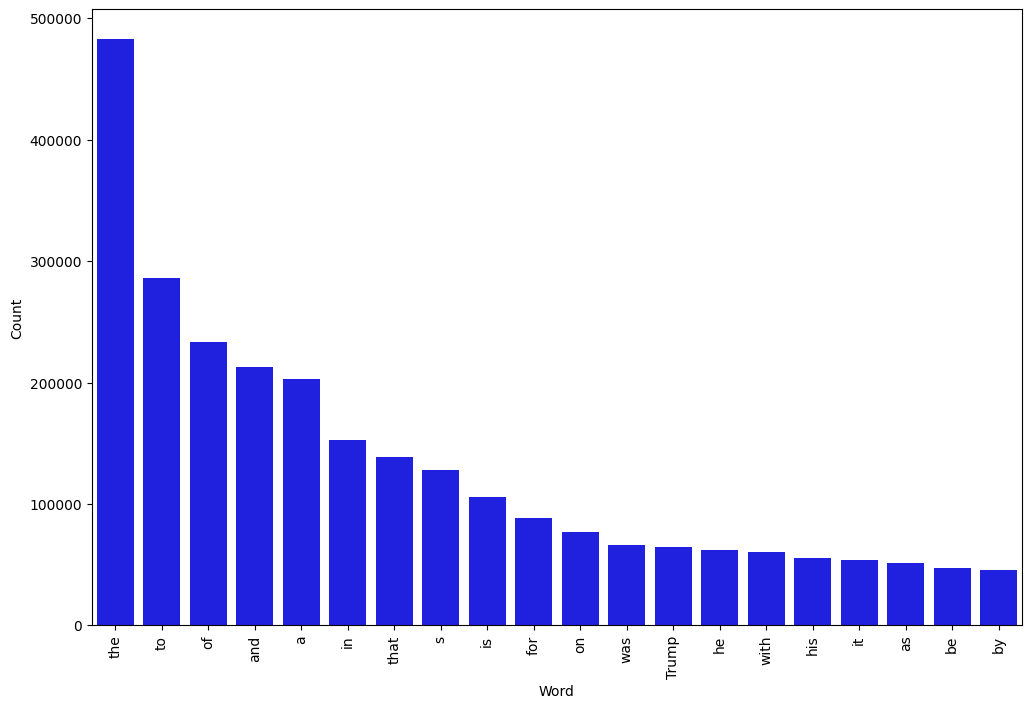

In [ ]:
# Most frequent words in fake news
counter(df[df["target"] == 1], "text", 20)

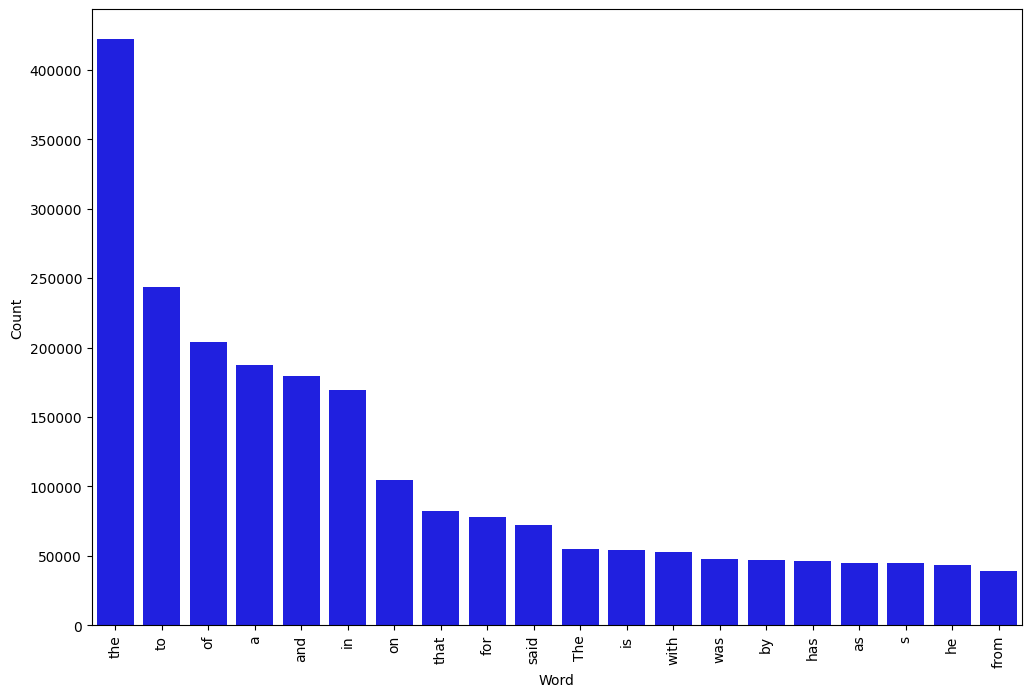

In [ ]:
# Most frequent words in real news
counter(df[df["target"] == 0], "text", 20)

**Text Preprocessing**

In [ ]:
text=df.text
text

0        This is a great story for anyone who doesn t u...
1        TIRANA (Reuters) - Albania is planning to try ...
2        WASHINGTON (Reuters) - U.S. President Donald T...
3        If you ve recently noticed that you haven t se...
4        WASHINGTON (Reuters) - U.S. President-elect Do...
                               ...                        
44893    WASHINGTON (Reuters) - California and Wisconsi...
44894    (Reuters) - A gift-wrapped package addressed t...
44895    NEW YORK (Reuters) - Continental Resources Chi...
44896    Wow! Talk about clueless! Austen Fletcher appr...
44897    Donald Trump is calling for one of the most co...
Name: text, Length: 44898, dtype: object

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Tokenization**

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
text


0        This is a great story for anyone who doesn t u...
1        TIRANA ( Reuters ) - Albania is planning to tr...
2        WASHINGTON ( Reuters ) - U . S . President Don...
3        If you ve recently noticed that you haven t se...
4        WASHINGTON ( Reuters ) - U . S . President-ele...
                               ...                        
44893    WASHINGTON ( Reuters ) - California and Wiscon...
44894    ( Reuters ) - A gift-wrapped package addressed...
44895    NEW YORK ( Reuters ) - Continental Resources C...
44896    Wow ! Talk about clueless ! Austen Fletcher ap...
44897    Donald Trump is calling for one of the most co...
Name: text, Length: 44898, dtype: object

**Removing Special Characters**

In [ ]:
text=text.str.replace('[^a-zA-Z0-9]+',' ', regex=True)
text

0        This is a great story for anyone who doesn t u...
1        TIRANA Reuters Albania is planning to try to l...
2        WASHINGTON Reuters U S President Donald Trump ...
3        If you ve recently noticed that you haven t se...
4        WASHINGTON Reuters U S President elect Donald ...
                               ...                        
44893    WASHINGTON Reuters California and Wisconsin sa...
44894     Reuters A gift wrapped package addressed to U...
44895    NEW YORK Reuters Continental Resources Chief E...
44896    Wow Talk about clueless Austen Fletcher approa...
44897    Donald Trump is calling for one of the most co...
Name: text, Length: 44898, dtype: object

**Lemmatizing and converting to Lowercase**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lem=WordNetLemmatizer()
text = text.apply(lambda x:[lem.lemmatize(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0        this is a great story for anyone who doesn t u...
1        tirana reuters albania is planning to try to l...
2        washington reuters u s president donald trump ...
3        if you ve recently noticed that you haven t se...
4        washington reuters u s president elect donald ...
                               ...                        
44893    washington reuters california and wisconsin sa...
44894    reuters a gift wrapped package addressed to u ...
44895    new york reuters continental resource chief ex...
44896    wow talk about clueless austen fletcher approa...
44897    donald trump is calling for one of the most co...
Name: text, Length: 44898, dtype: object

**Removing Stopwords**

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
sw=stopwords.words('english')
text=text.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        great story anyone understand power one libera...
1        tirana reuters albania planning try lure five ...
2        washington reuters u president donald trump sa...
3        recently noticed seen melania trump recently l...
4        washington reuters u president elect donald tr...
                               ...                        
44893    washington reuters california wisconsin said u...
44894    reuters gift wrapped package addressed u treas...
44895    new york reuters continental resource chief ex...
44896    wow talk clueless austen fletcher approach ant...
44897    donald trump calling one controversial raciall...
Name: text, Length: 44898, dtype: object

In [ ]:
y=df['target']
y.shape


(44898,)

In [ ]:
pr=pd.DataFrame(text)
pr['target']=y
pr.to_csv('pr.csv',index=False)